!jt -t chesterish
# !jt -r

In [8]:
from genetic_algorithm import *
from numpy.random import default_rng


import binascii


import matplotlib.pyplot as plt
import math
from matplotlib.animation import FuncAnimation
%matplotlib notebook

import copy
from collections import Counter
import pandas as pd

In [9]:
## hexadecimal generator

nr_of_input = 2
nr_of_actions = 5
nr_of_inner = 3
nr_of_genes = 8
nr_individuals = 50

## world size
world_size = 10
world_size_x = world_size
world_size_y = world_size

## generations

0


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 14.49it/s]


<IPython.core.display.Javascript object>


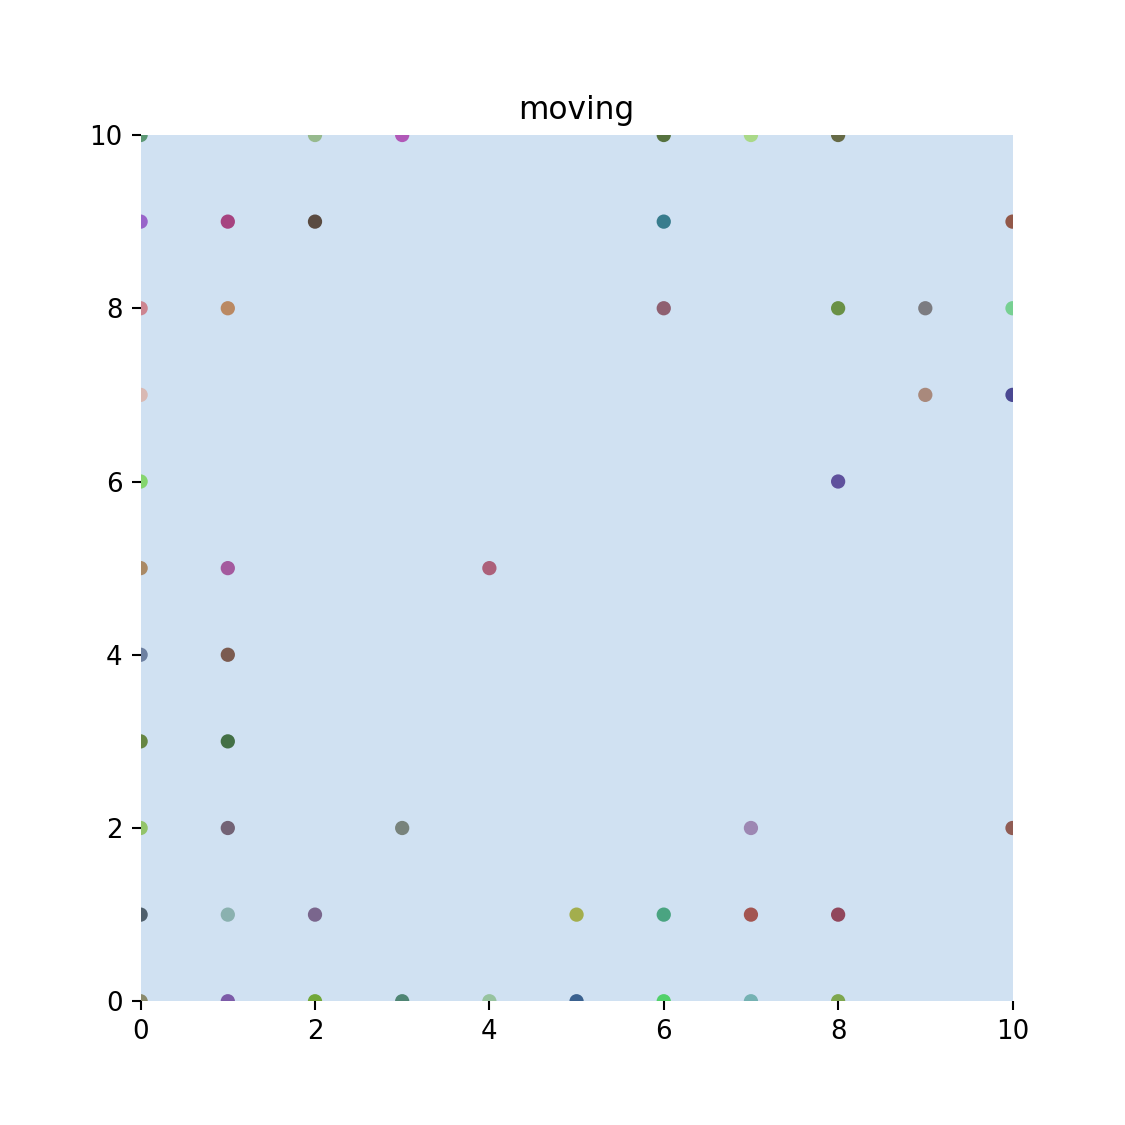

MovieWriter imagemagick unavailable; using Pillow instead.


1


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 18.78it/s]


<IPython.core.display.Javascript object>


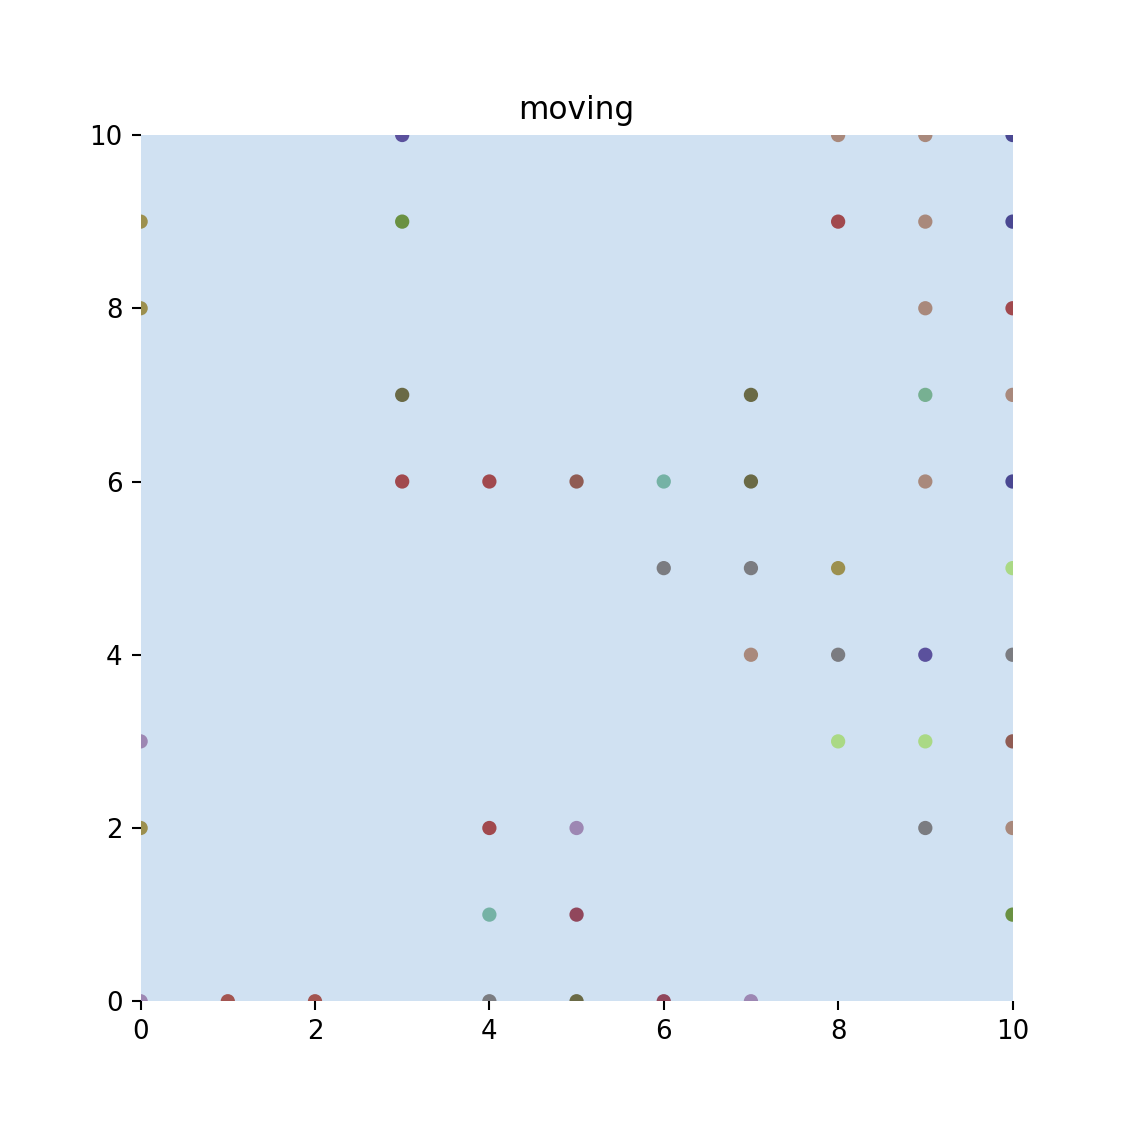

MovieWriter imagemagick unavailable; using Pillow instead.


2


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 14.21it/s]


<IPython.core.display.Javascript object>


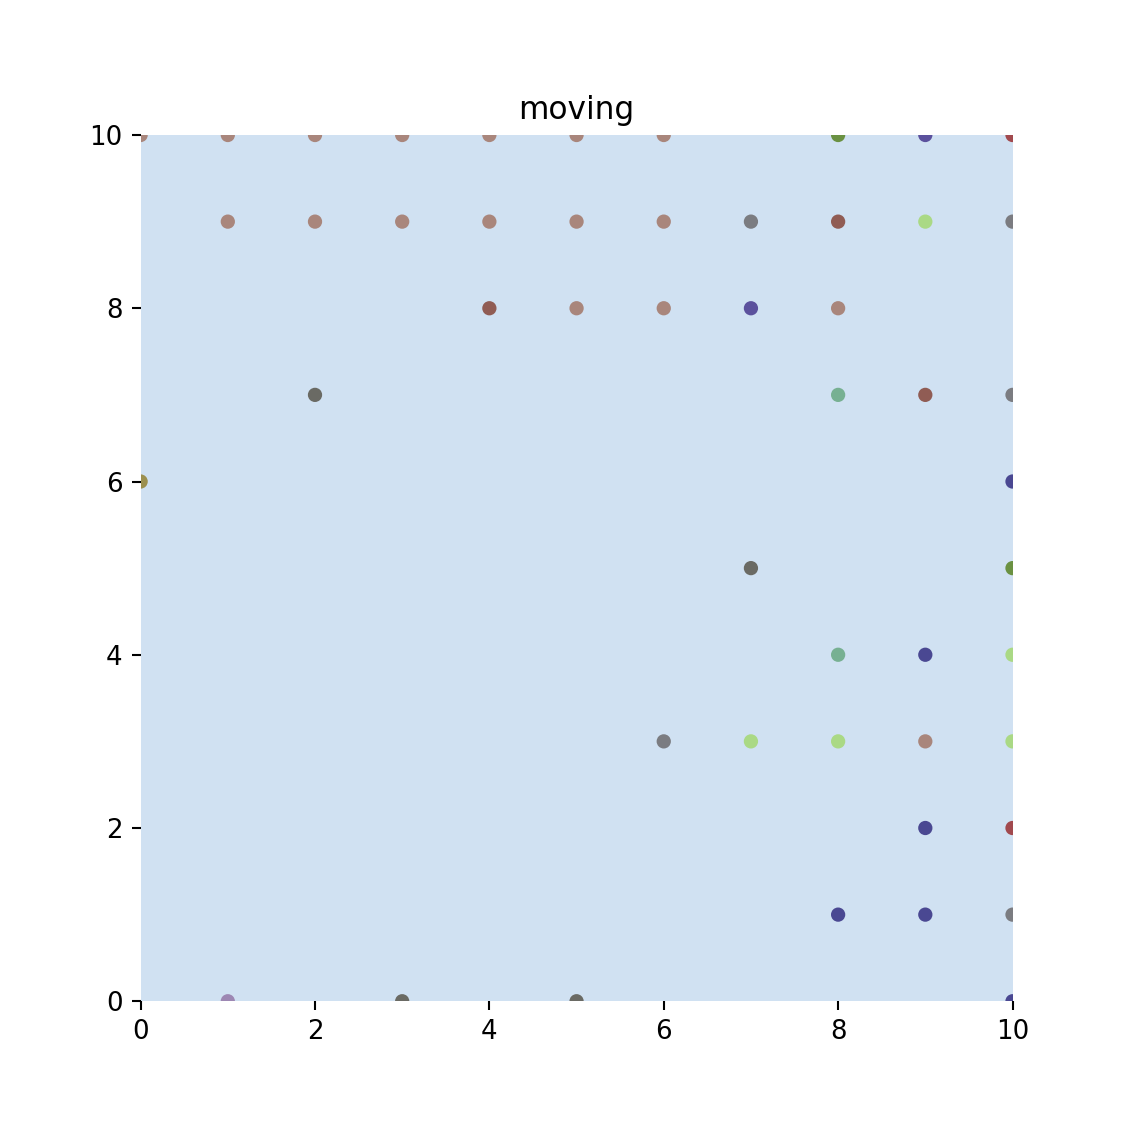

MovieWriter imagemagick unavailable; using Pillow instead.


3


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 19.36it/s]


<IPython.core.display.Javascript object>


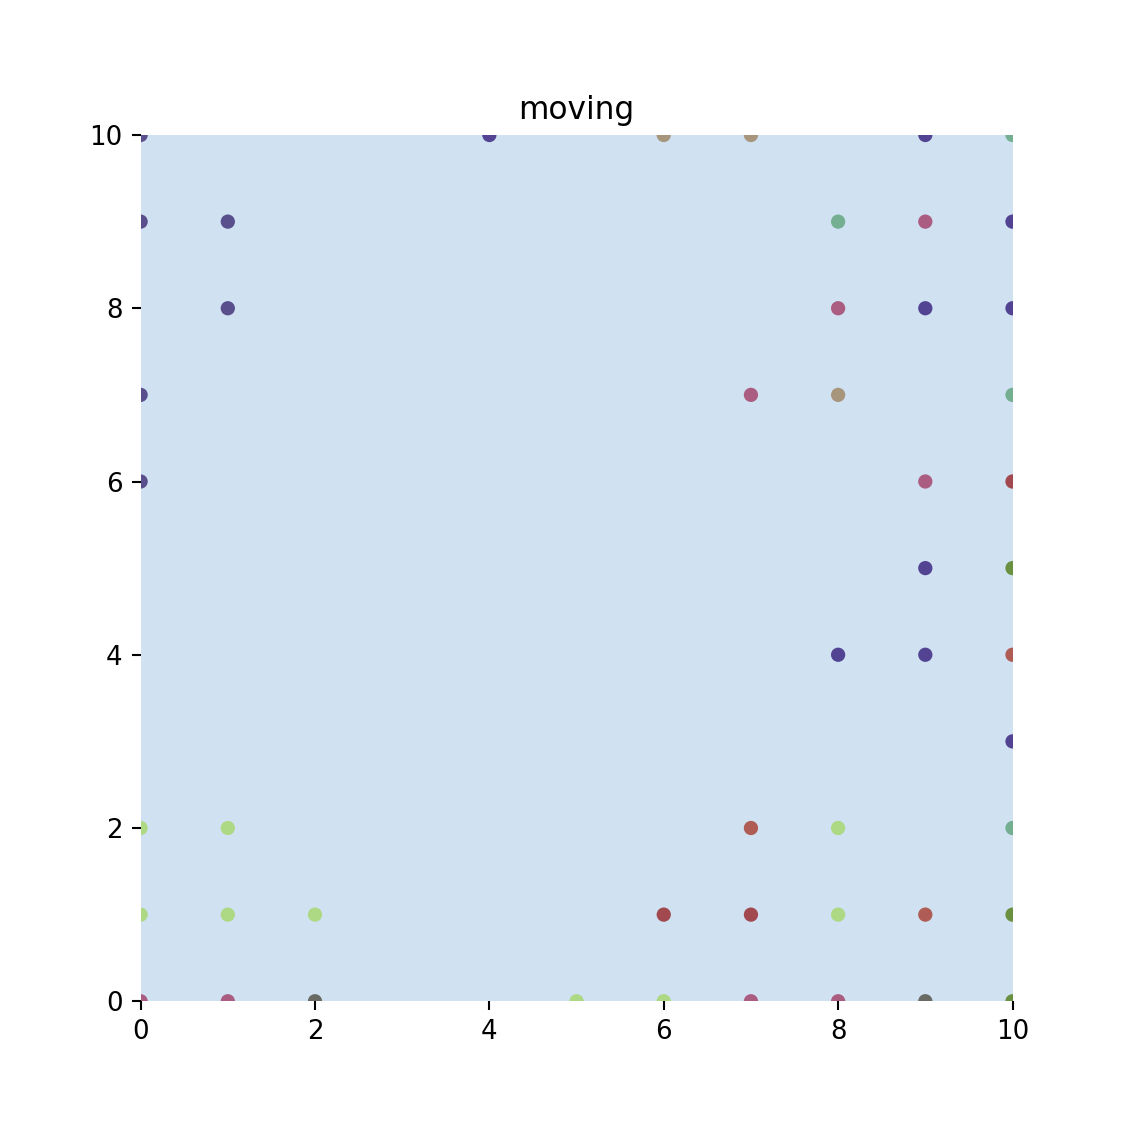

MovieWriter imagemagick unavailable; using Pillow instead.


4


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 22.28it/s]


<IPython.core.display.Javascript object>


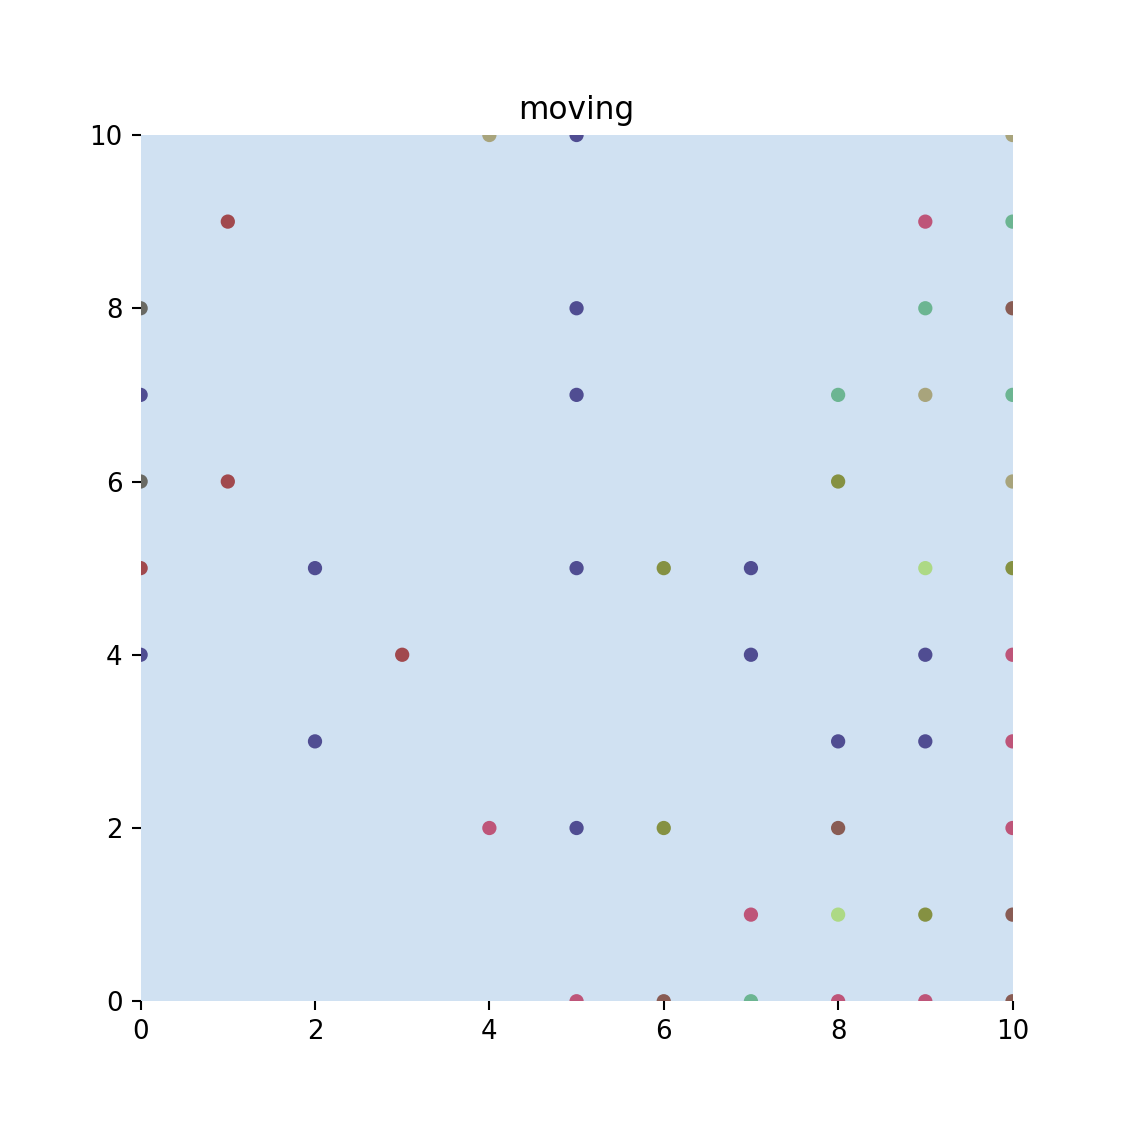

MovieWriter imagemagick unavailable; using Pillow instead.


5


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 18.59it/s]


<IPython.core.display.Javascript object>


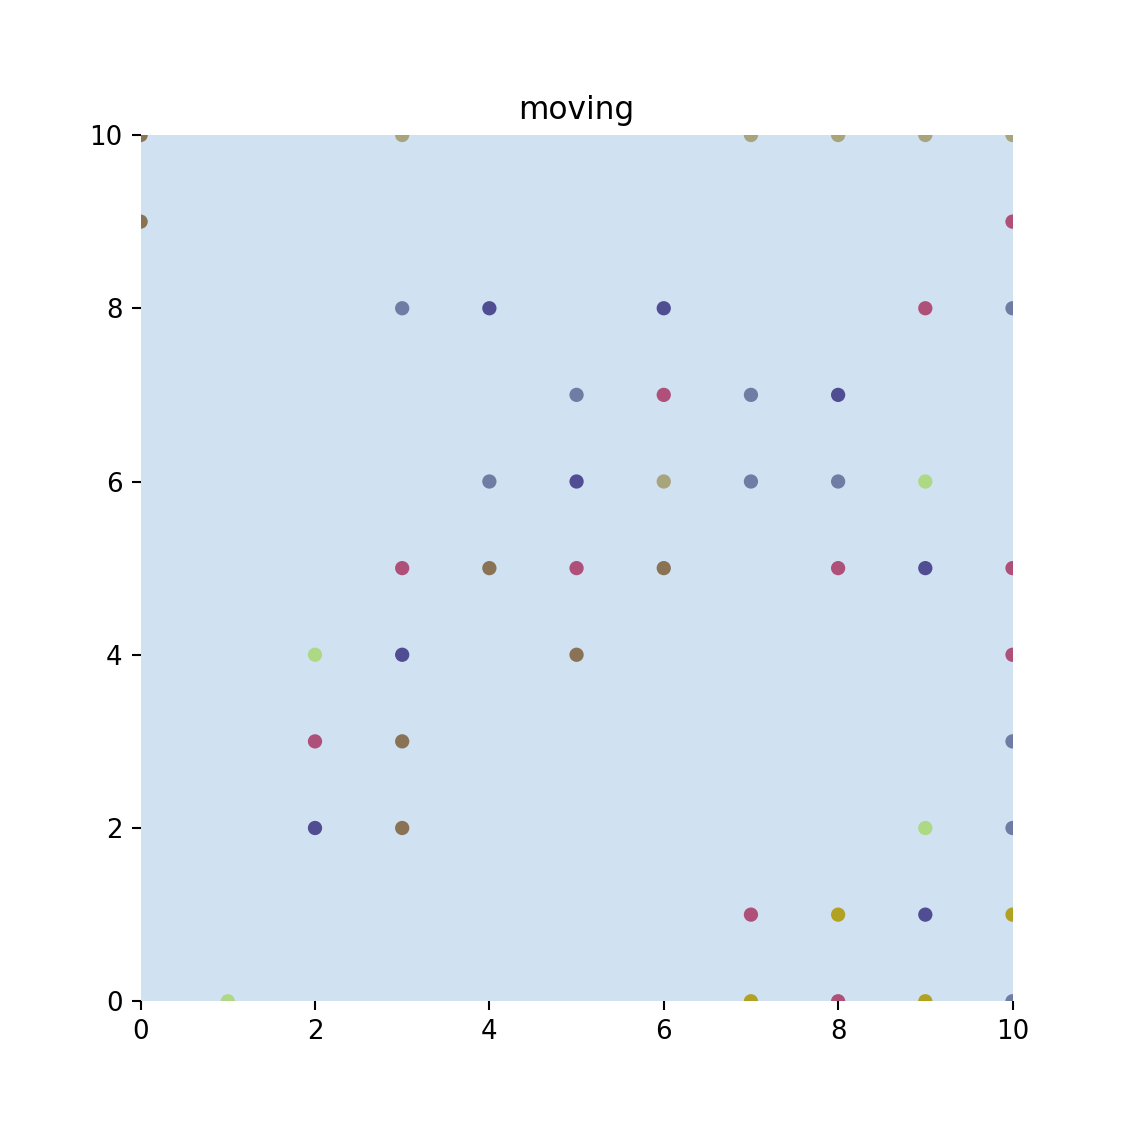

MovieWriter imagemagick unavailable; using Pillow instead.


6


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 15.82it/s]


<IPython.core.display.Javascript object>


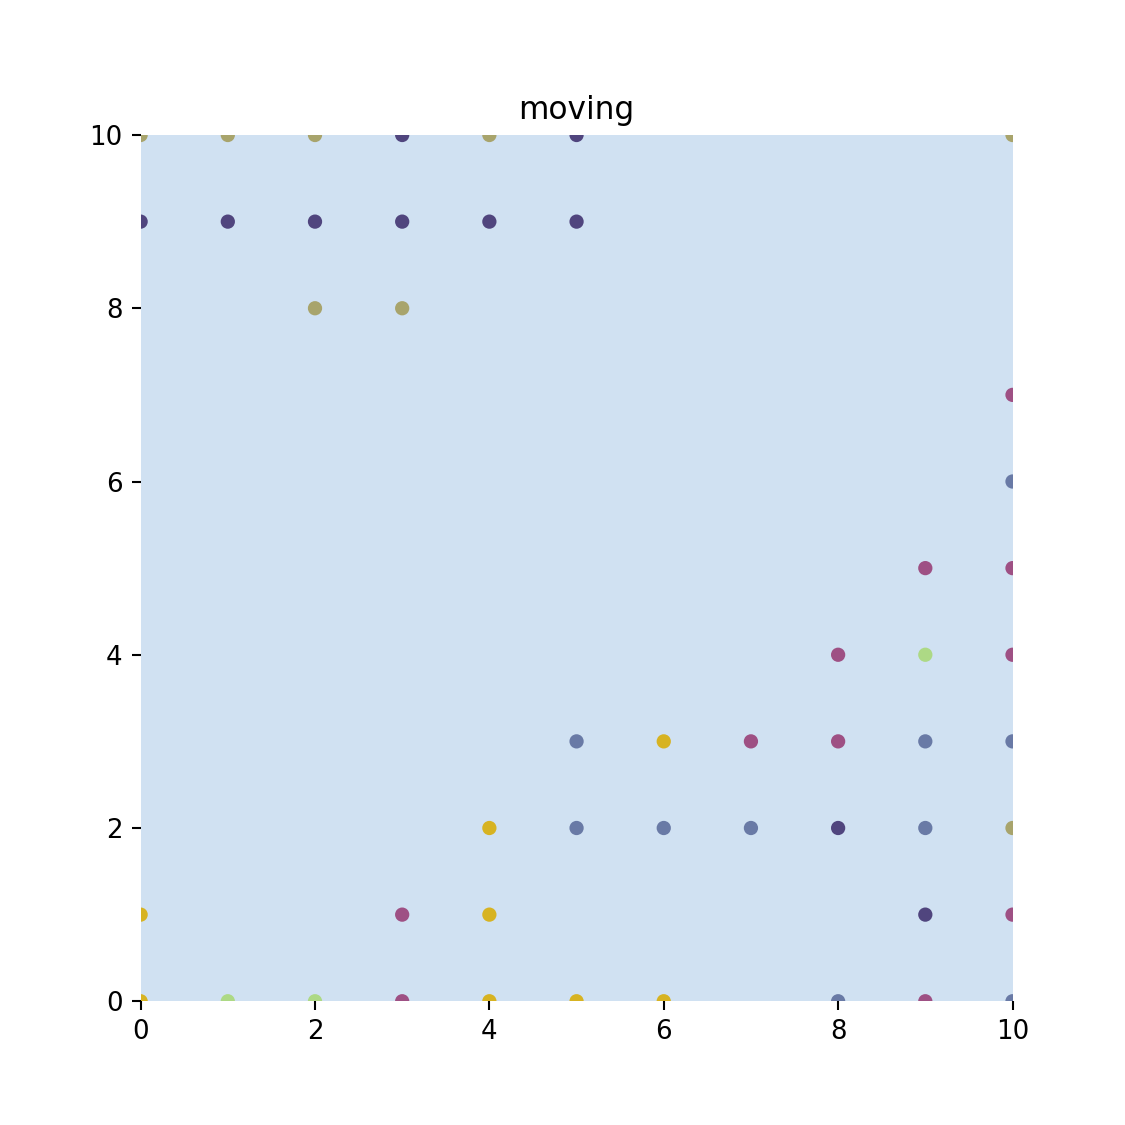

MovieWriter imagemagick unavailable; using Pillow instead.


7


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 18.53it/s]


<IPython.core.display.Javascript object>


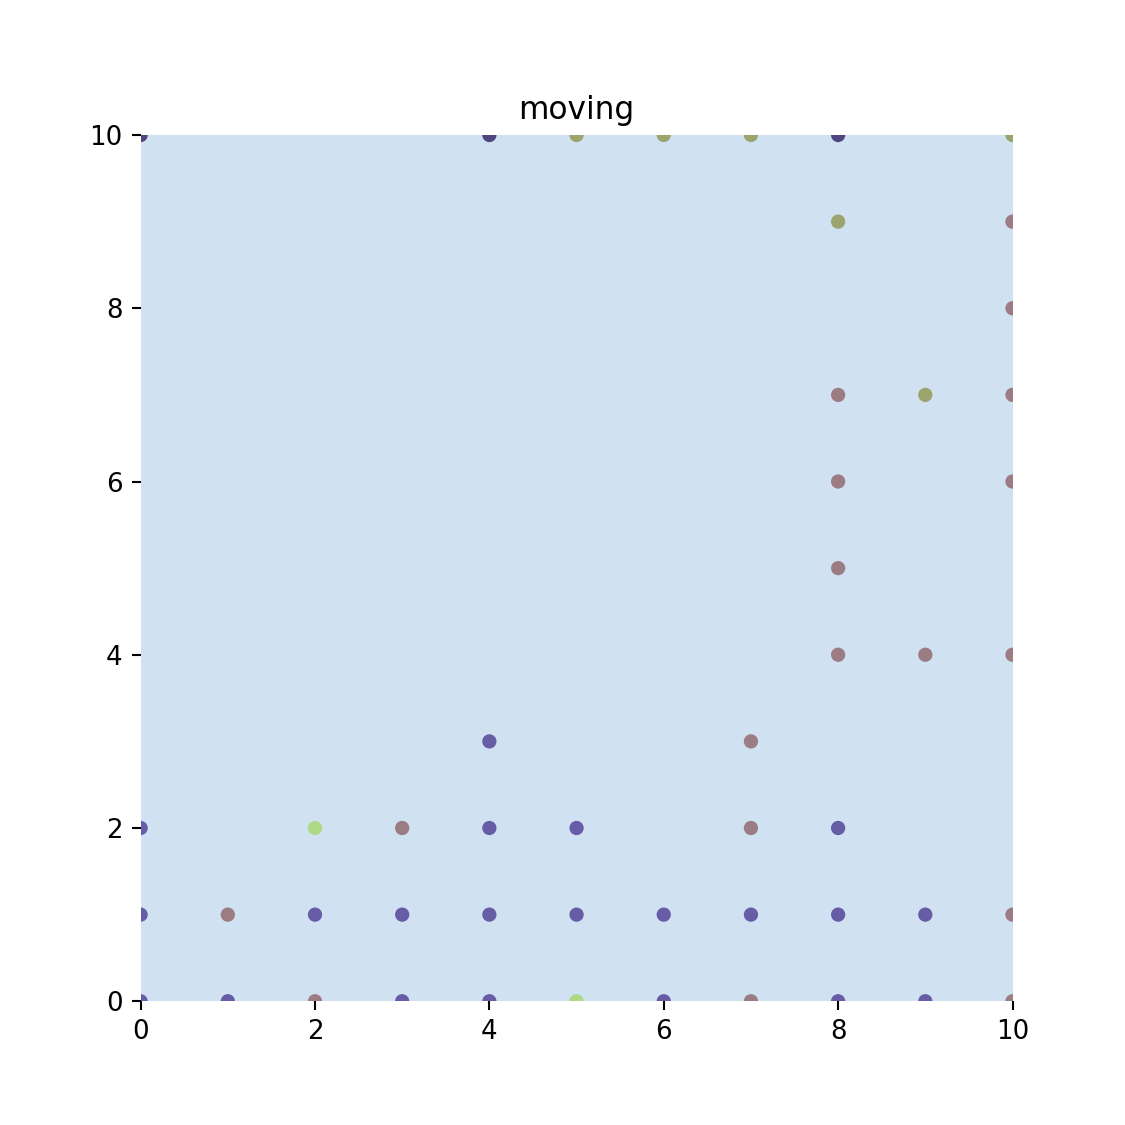

MovieWriter imagemagick unavailable; using Pillow instead.


8


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 31.00it/s]


<IPython.core.display.Javascript object>


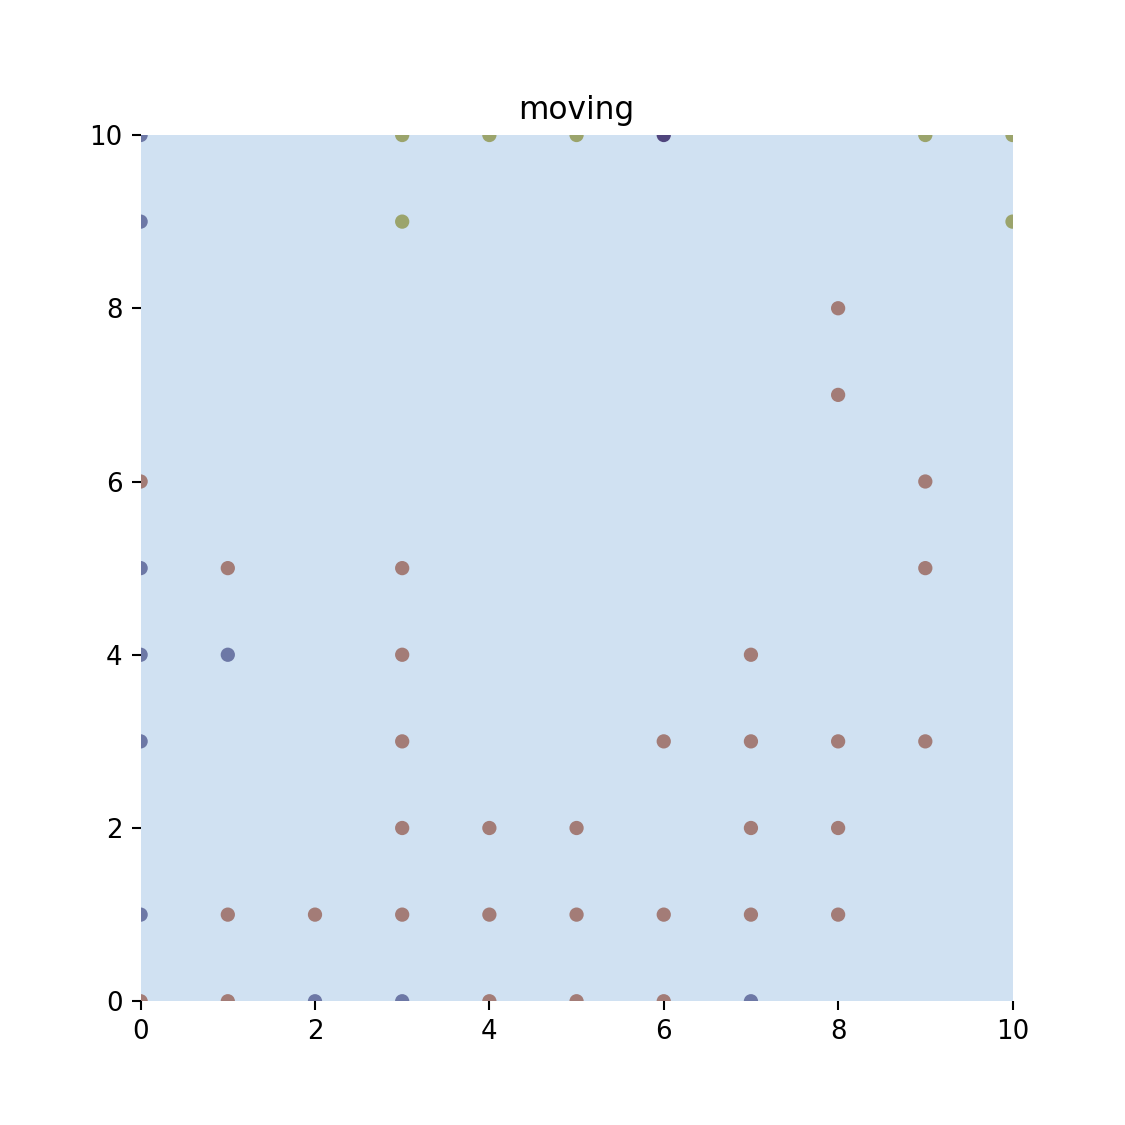

MovieWriter imagemagick unavailable; using Pillow instead.


9


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 19.11it/s]


<IPython.core.display.Javascript object>


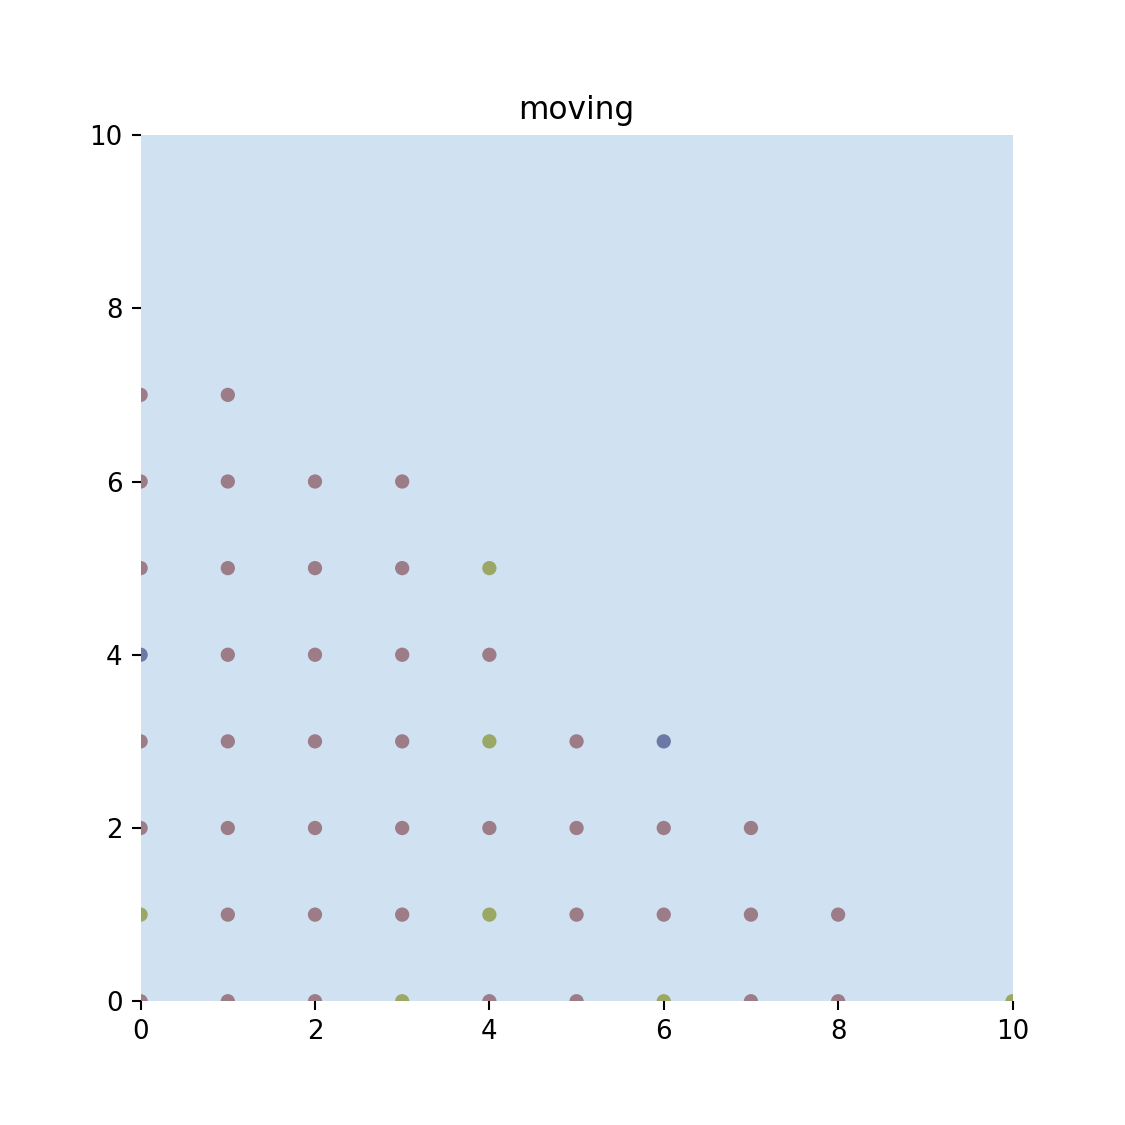

MovieWriter imagemagick unavailable; using Pillow instead.


In [10]:
result = {}
for gen_nr in range(10):
    print(gen_nr)
    if gen_nr == 0:
        result = initial_population(nr_individuals, nr_of_genes, nr_of_input, nr_of_actions, nr_of_inner, world_size)
        result = steps_in_generation(world_size*2, result, world_size_x, world_size_y)
#         print(result[0])
    else:
        
        result = asexual_reproduction_and_mutation(world_size, result, nr_individuals)
        
        result = next_generation(result,nr_of_input, nr_of_actions, nr_of_inner, world_size, nr_individuals)
        result = steps_in_generation(world_size*2, result, world_size_x, world_size_y)

    result.update(result)
    
    dic_color = {}
    for indiv in result:
        rgb_colors = list(map(hex_to_rgb, result[indiv]['genome']))
        color = tuple(pd.DataFrame(rgb_colors).median()) 
        dic_color[indiv] = color
        
    coords = generate_dictionary_of_coords(result, world_size*2, dic_color)
    
    def update(i):
        ax.clear()
        ax.set_facecolor(plt.cm.Blues(.2))

        ax.set_xlim([0,world_size_x])
        ax.set_ylim([0,world_size_y])
        ax.set_title('moving')
        ax.scatter(x=coords[i]['x'],y=coords[i]['y'], c=coords[i]['color'], s=20, marker='o')
        [spine.set_visible(False) for spine in ax.spines.values()]


    fig, ax = plt.subplots(figsize=(6,6))
    myAnimation = FuncAnimation(
        fig = fig,
        func = update,
        frames = len(coords),
        interval = 10, repeat=False
    )
    myAnimation.save(f'generation-{gen_nr}.gif', writer='imagemagick' , fps=10)

In [11]:
result

{0: {'out': {'out1': 0.935, 'out4': 0.542},
  'brain': {'mid0mid0': ['mid0', 'mid0', 2.40292995574546],
   'mid1mid1': ['mid1', 'mid1', 3.937005951472608],
   'mid2out1': ['mid2', 'out1', 0.9532122691896842],
   'mid0out4': ['mid0', 'out4', -2.173294674195025],
   'mid1mid2': ['mid1', 'mid2', -1.8031435983519],
   'in0out1': ['in0', 'out1', 0.38126049137799484]},
  'in': ['in0'],
  'genome': ['ef1ecce3',
   'd55e815e',
   '859a9e80',
   '92ca458a',
   'a552fdf9',
   'd21a39b2',
   '6a9f4e94',
   '50d68c33'],
  'position': [[2, 2],
   [2, 2],
   [2, 1],
   [2, 0],
   [2, 0],
   [2, 0],
   [2, 0],
   [2, 0],
   [2, 0],
   [2, 0],
   [2, 0],
   [2, 0],
   [2, 0],
   [2, 0],
   [2, 0],
   [2, 0],
   [2, 0],
   [2, 0],
   [2, 0],
   [2, 0],
   [2, 0]],
  'brain_after_pruning': [('mid0', 'mid0', 2.40292995574546),
   ('mid1', 'mid1', 3.937005951472608),
   ('mid2', 'out1', 0.9532122691896842),
   ('mid0', 'out4', -2.173294674195025),
   ('mid1', 'mid2', -1.8031435983519),
   ('in0', 'out1', 

In [12]:
def asexual_reproduction_and_mutation(world_size, result, nr_individuals):
    survivors, n = select_individuals_from_safezone(world_size, result)

    ## reproduct survivors        
    new_indiv_len = nr_individuals - list(survivors.keys())[-1]
    new_indiv_nr = np.random.choice(list(survivors.keys()), new_indiv_len-1)

    for key in new_indiv_nr:
        survivors[n] = {'genome':[]}
        survivors[n]['genome'] = survivors[key]['genome'] 
        n+=1
        
    ## mutate population
#     for key in survivors:
#         genome_mutation(survivors[key]['genome'])
    
    return survivors

In [13]:
asexual_reproduction_and_mutation(world_size, result, nr_individuals)

{0: {'genome': ['7dab0053',
   '727e175a',
   'd26ef65a',
   'afedb754',
   '3aa580e1',
   'b8aa48fb',
   'bb73e4c5',
   '86fc4a41']},
 1: {'genome': ['ef1ecce3',
   'd55e815e',
   '859a9e80',
   '92ca458a',
   'a552fdf9',
   'd21a39b2',
   '6a9f4e94',
   '50d68c33']},
 2: {'genome': ['ef1ecce3',
   'd55e815e',
   '859a9e80',
   '92ca458a',
   'a552fdf9',
   'd21a39b2',
   '6a9f4e94',
   '50d68c33']},
 3: {'genome': ['ef1ecce3',
   'd55e815e',
   '859a9e80',
   '92ca458a',
   'a552fdf9',
   'd21a39b2',
   '6a9f4e94',
   '50d68c33']},
 4: {'genome': ['ef1ecce3',
   'd55e815e',
   '859a9e80',
   '92ca458a',
   'a552fdf9',
   'd21a39b2',
   '6a9f4e94',
   '50d68c33']},
 5: {'genome': ['ef1ecce3',
   'd55e815e',
   '859a9e80',
   '92ca458a',
   'a552fdf9',
   'd21a39b2',
   '6a9f4e94',
   '50d68c33']},
 6: {'genome': ['ef1ecce3',
   'd55e815e',
   '859a9e80',
   '92ca458a',
   'a552fdf9',
   'd21a39b2',
   '6a9f4e94',
   '50d68c33']},
 7: {'genome': ['ef1ecce3',
   'd55e815e',
   '859a9e80